In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Description: CC GENERAL.csv

This dataset contains information about credit card usage behavior by customers. The variables span different aspects such as purchase habits, payment patterns, and credit usage. Below is a detailed explanation of each variable in the dataset:

### Customer Identification
- **CUSTID**: Identification of Credit Card holder (Categorical)

### Balance and Usage Metrics
- **BALANCE**: Balance amount left in the account to make purchases
- **BALANCEFREQUENCY**: Frequency of balance updates; a score between 0 and 1

### Purchase Behavior
- **PURCHASES**: Total number of purchases made from the account
- **ONEOFFPURCHASES**: Maximum purchase amount made in a single transaction
- **INSTALLMENTSPURCHASES**: Total amount of purchases made via installments
- **PURCHASESFREQUENCY**: Frequency of purchases made; a score between 0 and 1
- **ONEOFFPURCHASESFREQUENCY**: Frequency of one-go purchases
- **PURCHASESINSTALLMENTSFREQUENCY**: Frequency of purchases made in installments
- **PURCHASESTRX**: Number of purchase transactions made

### Cash Advance Features
- **CASHADVANCE**: Total amount of cash in advance taken by the user
- **CASHADVANCEFREQUENCY**: Frequency of cash advances taken
- **CASHADVANCETRX**: Number of cash advance transactions made

### Payments
- **PAYMENTS**: Total payments made by the user
- **PRCFULLPAYMENT**: Percentage of full payment done by the user
- **MINIMUM_PAYMENTS**: Minimum payment amount made by the user

### Credit Card Service Details
- **CREDITLIMIT**: Limit on the credit card assigned to the user
- **TENURE**: Number of months the user has been a customer (i.e., service duration)

---

This dataset is useful for customer segmentation, behavioral analysis, credit risk modeling, and targeted marketing strategies.


In [2]:
df = pd.read_csv('../dataset/CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Step 2: Check for null values
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Step 3: Handle null values
df_cleaned = df.dropna()


In [8]:
df_cleaned.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# Step 4: feature scaling
from sklearn.preprocessing import StandardScaler

# Drop object CUST_ID
df_cleaned = df_cleaned.copy()
df_cleaned.drop('CUST_ID', axis=1, inplace=True)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_cleaned)

# Convert the result back to a DataFrame for easier handling
df_scaled = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

# Display the scaled data
df_scaled.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


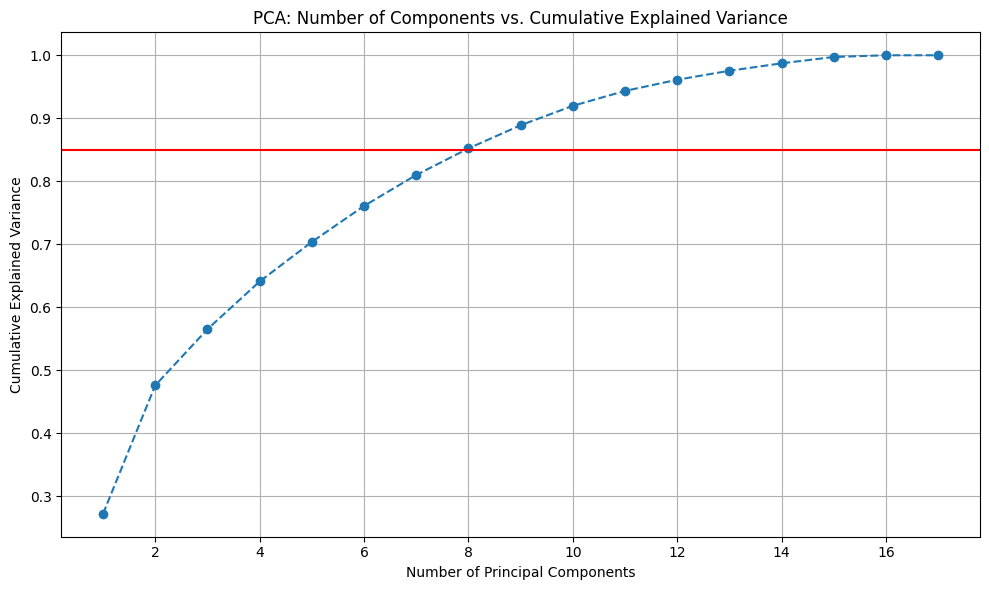

Number of components to cover 85% variance: 8


In [10]:
# Step 5: PCA and Explained Variance Plot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize PCA and fit to the scaled data
pca = PCA()
pca.fit(df_scaled)

# Get cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.85, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Number of Components vs. Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Determine number of components to reach 85% variance
num_components_85 = np.argmax(cumulative_variance >= 0.85) + 1
print(f"Number of components to cover 85% variance: {num_components_85}")


In [11]:
# Step 6: PCA with 2 components for visualization (only 2 so we can compress into 2D space)
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(df_scaled)

# Convert to DataFrame for visualization
df_pca_2d = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Display first 5 rows
df_pca_2d.head()


,PC1,PC2
0,-1.696395,-1.122584
1,-1.215681,2.435638
2,0.935853,-0.385202
3,-1.614638,-0.724586
4,0.223701,-0.783610


In [12]:
# Step 7: Find the two columns with the highest covariance
cov_matrix = np.cov(df_scaled.T)

# Create a dataframe from the covariance matrix
cov_df = pd.DataFrame(cov_matrix, index=df_scaled.columns, columns=df_scaled.columns)

# Mask the diagonal and lower triangle (since it's symmetric) to avoid redundancy
cov_df_masked = cov_df.where(~np.tril(np.ones(cov_df.shape)).astype(bool))

# Find the max covariance value and corresponding columns
max_cov_value = cov_df_masked.max().max()
max_cov_pair = cov_df_masked.stack().idxmax()

print(f"Highest covariance value: {max_cov_value}")
print(f"Columns with highest covariance: {max_cov_pair[0]} and {max_cov_pair[1]}")


Highest covariance value: 0.9168863945187942
Columns with highest covariance: PURCHASES and ONEOFF_PURCHASES


> NOTE: Recall that covariance tells us how two variables change together: positive, zero, or negative

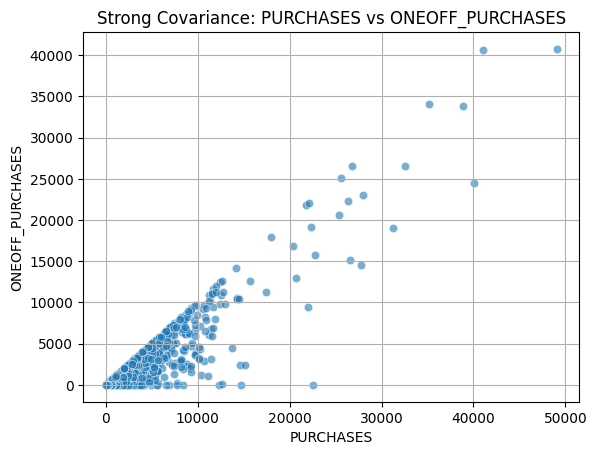

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='PURCHASES', y='ONEOFF_PURCHASES', alpha=0.6)
plt.title('Strong Covariance: PURCHASES vs ONEOFF_PURCHASES')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')
plt.grid(True)
plt.show()


In [14]:
# Step 8: Interpret PCA results using get_covariance()
pca_2d_cov = pca_2d.get_covariance()

# Reconstruct the covariance matrix and create a DataFrame for readability
pca_cov_df = pd.DataFrame(pca_2d_cov, index=df_scaled.columns, columns=df_scaled.columns)

# Display 5 rows
pca_cov_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.101079,0.189612,0.210726,0.210225,0.111754,0.498135,-0.097248,0.092248,-0.099335,0.464235,0.464066,0.131264,0.362091,0.405739,0.220598,-0.179572,0.023608
BALANCE_FREQUENCY,0.189612,0.689375,0.200824,0.179328,0.145173,0.146752,0.075041,0.125231,0.059227,0.113709,0.127425,0.168940,0.182488,0.213740,0.088773,-0.013887,0.032860
PURCHASES,0.210726,0.200824,1.286498,0.586777,0.559035,0.011279,0.511868,0.488218,0.436470,-0.103793,-0.035552,0.648812,0.384068,0.476244,0.122911,0.189363,0.128963
ONEOFF_PURCHASES,0.210225,0.179328,0.586777,1.093246,0.469429,0.044950,0.415544,0.409580,0.353160,-0.052457,0.003858,0.544928,0.342920,0.422127,0.117236,0.143455,0.108136
INSTALLMENTS_PURCHASES,0.111754,0.145173,0.559035,0.469429,1.052763,-0.056018,0.446444,0.401463,0.382843,-0.149042,-0.091208,0.532379,0.277708,0.350052,0.075088,0.184063,0.106147


In [15]:
# Ensure diagonal and lower triangle are ignored (no self-covariance or duplicate pairs)
mask = np.triu(np.ones(pca_cov_df.shape), k=1).astype(bool)
upper_tri_df = pca_cov_df.where(mask)

# Find the highest covariance value and the corresponding feature pair
max_cov_value = upper_tri_df.max().max()
max_cov_pair = upper_tri_df.stack().idxmax()

print(f"Highest covariance value (from PCA-reduced space): {max_cov_value}")
print(f"Columns with highest covariance: {max_cov_pair[0]} and {max_cov_pair[1]}")


Highest covariance value (from PCA-reduced space): 0.6488123354801393
Columns with highest covariance: PURCHASES and PURCHASES_TRX


Customers who spend more also tend to make more purchase transactions — a strong behavioral link that PCA chose to preserve in the top 2 components.

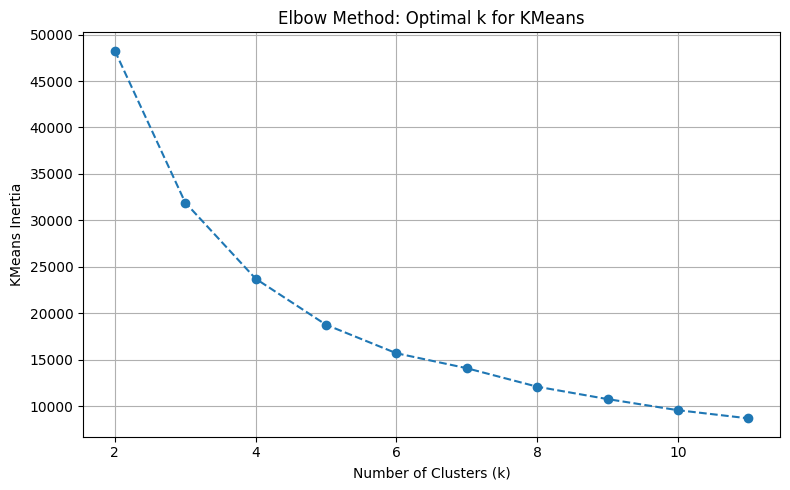

In [16]:
# Step 9: Elbow Method to determine optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

# Test K values from 2 to 11
K_range = range(2, 12)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_2d)
    inertia.append(kmeans.inertia_)

# Plot the inertia vs number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('KMeans Inertia')
plt.title('Elbow Method: Optimal k for KMeans')
plt.grid(True)
plt.tight_layout()
plt.show()


Looks like k = 4 is the optimal k

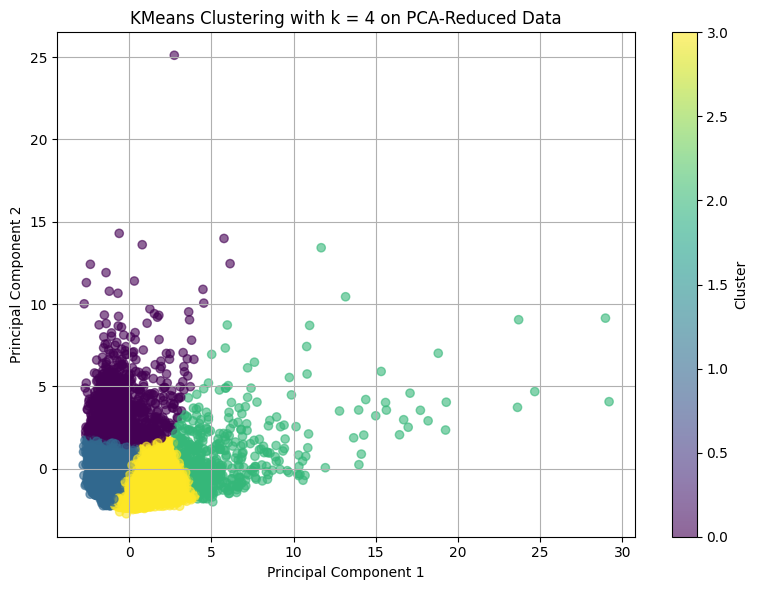

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform KMeans with optimal number of clusters (k = 4)
kmeans_final = KMeans(n_clusters=4, random_state=42)
df_pca_2d['Cluster'] = kmeans_final.fit_predict(df_pca_2d)

# Plot the clusters in PCA 2D space
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca_2d['PC1'], df_pca_2d['PC2'],
                      c=df_pca_2d['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with k = 4 on PCA-Reduced Data')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


In [18]:
df_pca_2d['Cluster'].value_counts().sort_index()


Cluster
0    1207
1    3735
2     482
3    3212
Name: count, dtype: int64

### Observations

- Each point represents a customer, projected in 2D PCA space (PC1 and PC2).

- Color indicates cluster assignment (Cluster 0 to Cluster 3).

- The elbow method previously identified k = 4 as the optimal number of clusters.

- You’ve now successfully grouped customers based on purchase and usage behavior.